<a href="https://colab.research.google.com/github/Kekkles1/BI-Colab/blob/fatima/MISSING_VALUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MISSING VALUES

**Approach**
First we will drop unnnecessary columns, fill in the missing values into the important columns and then remove those rows where approximately 70% of the columns have missing data.

In [20]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline

In [21]:
#read the CSV file
df = pd.read_csv("hotel_bookings_dirty.csv")

In [22]:
# remove arrival_date_year column and arrival_date_month  and 'arrival_date_weak_number and arrival_date_day_of_month and reservation_status and reservation_status_date column
df = df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month','reservation_status','reservation_status_date'], axis=1)

In [23]:
df = df.drop(['babies', 'required_car_parking_spaces', 'total_of_special_requests'], axis=1)

<Axes: >

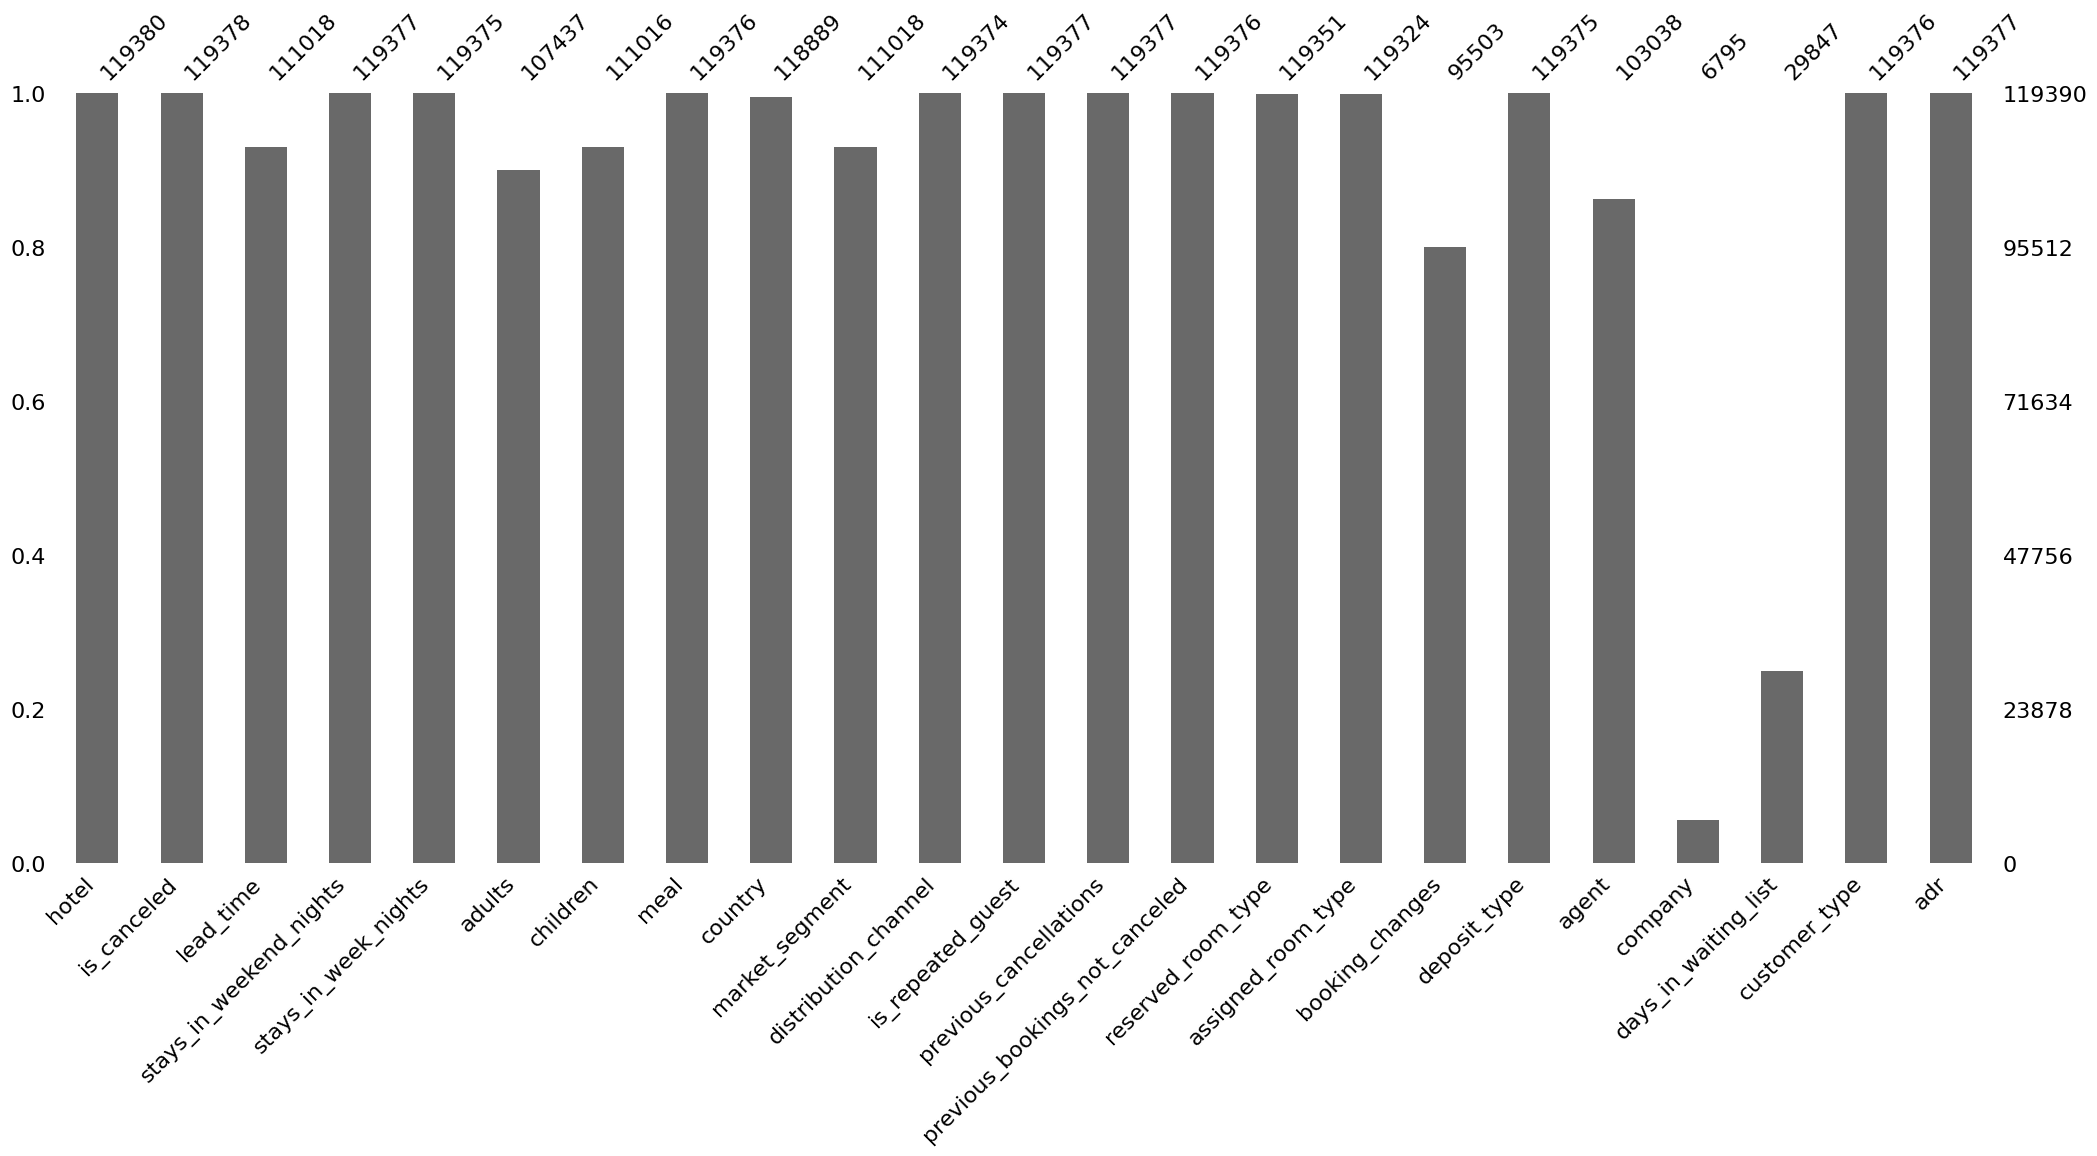

In [24]:
#see the completeness of the data using mano.bar
mano.bar(df)

Most incomplete data is company, then days_in_waiting list, then assigned_room_type

<Axes: >

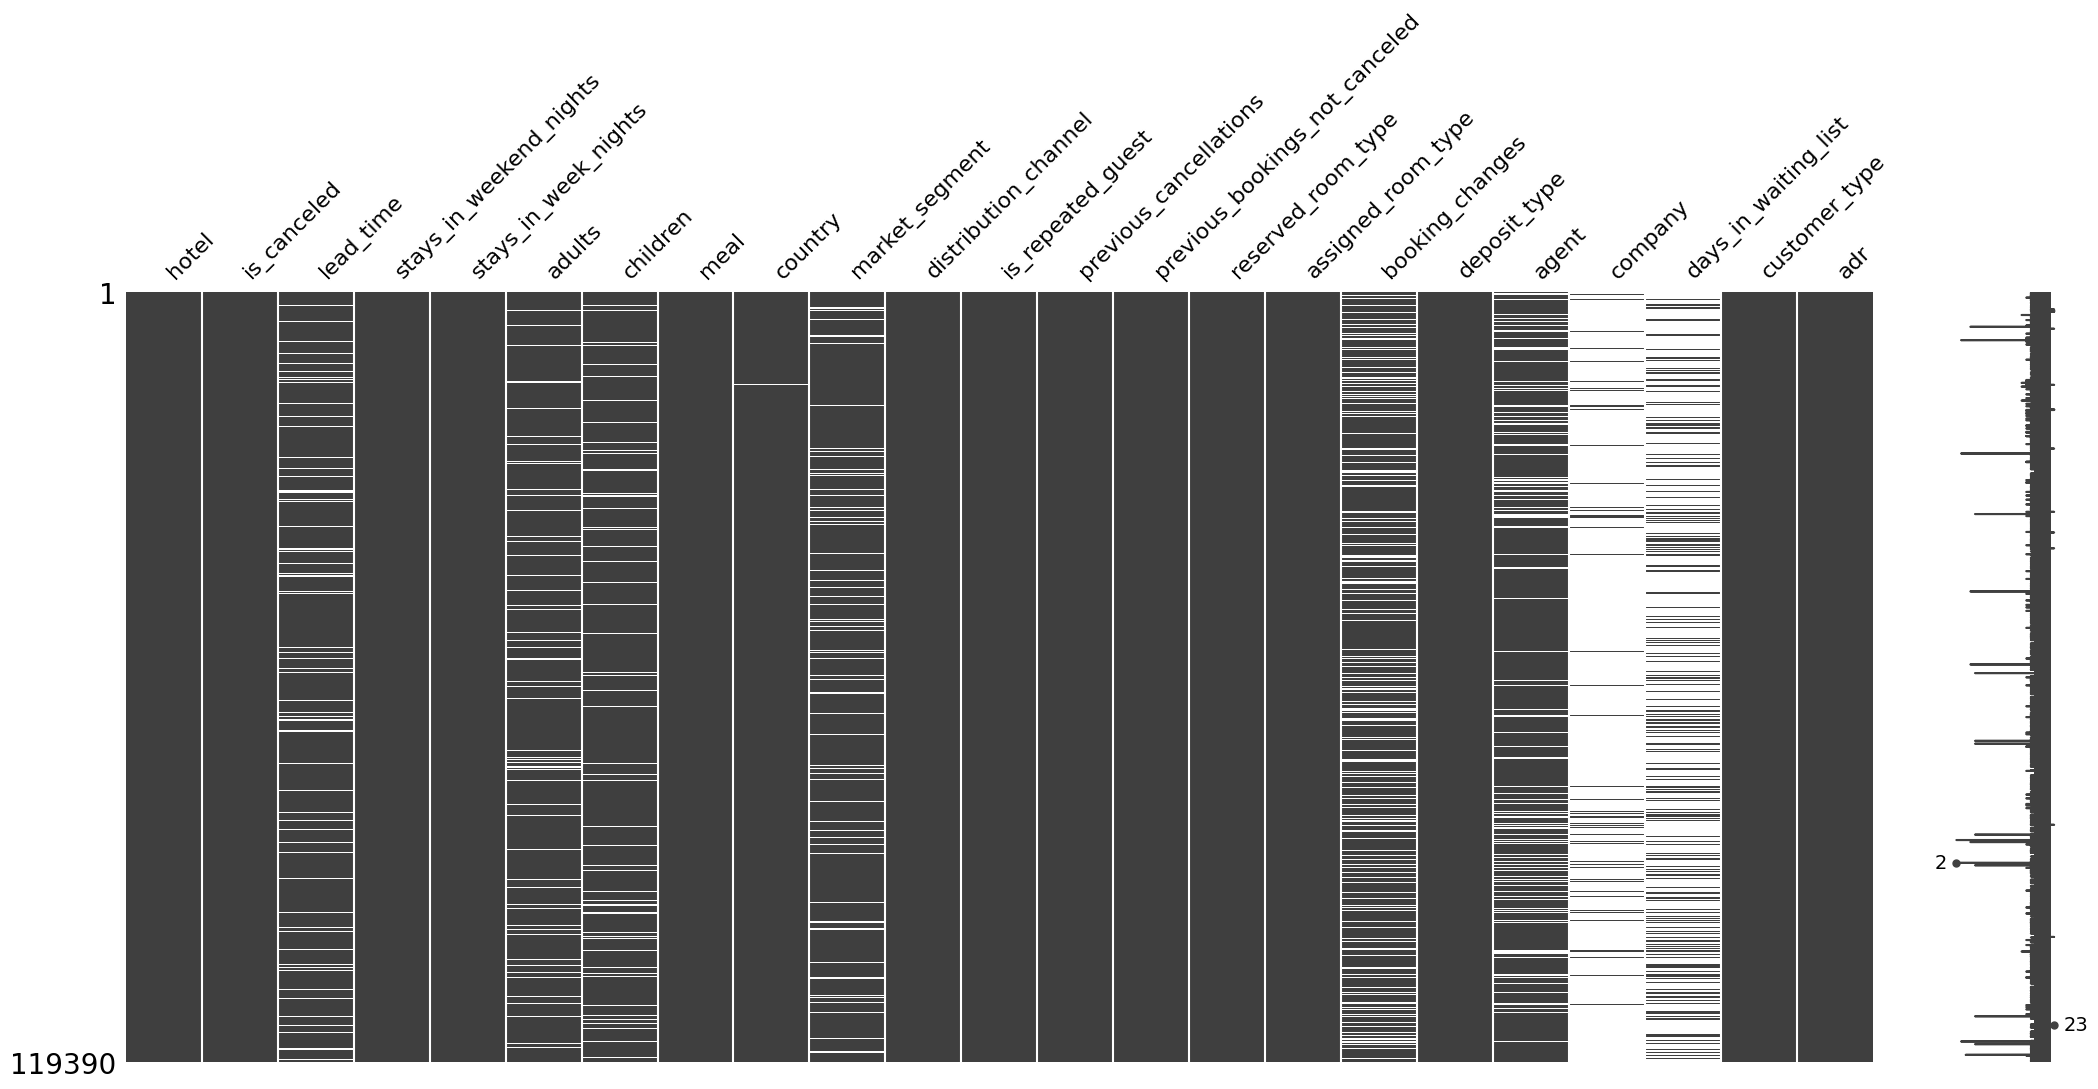

In [25]:
mano.matrix(df)

Adults and children have a similar pattern so potentially MNAR

<Axes: >

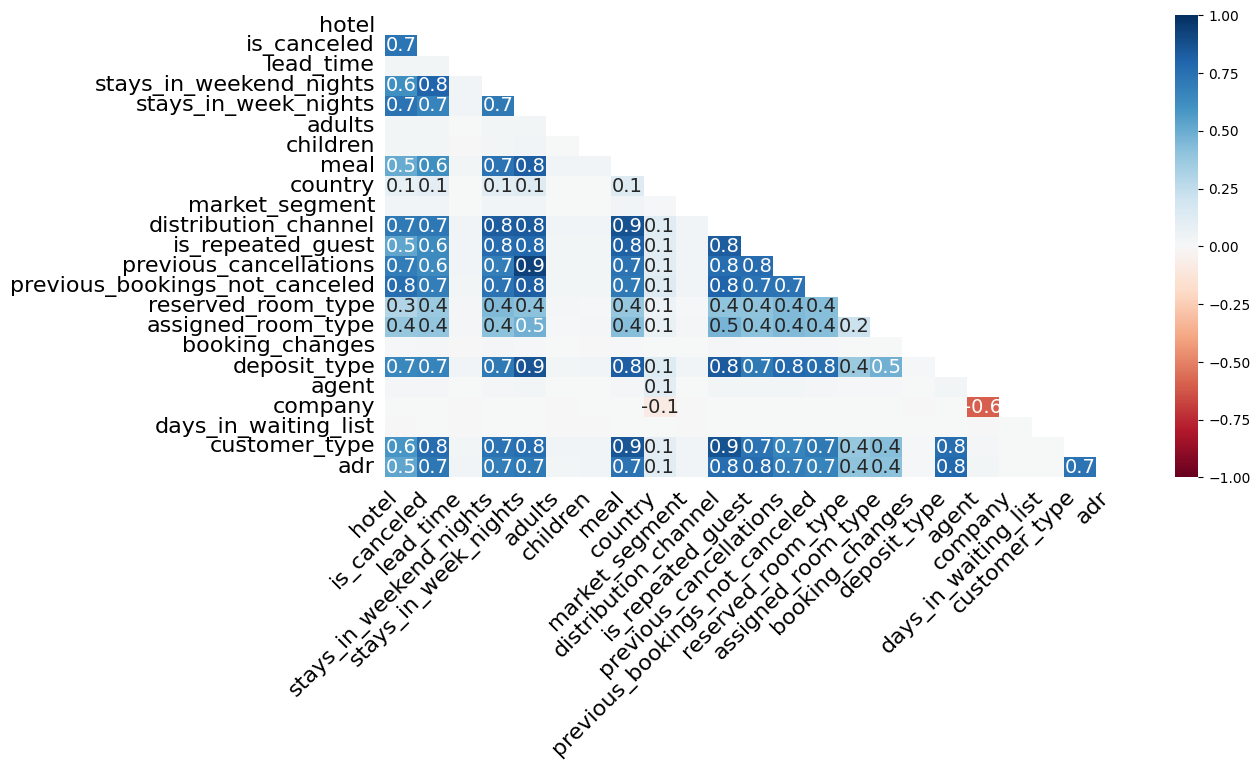

In [26]:
#plot the heatmap to determine the relationship (correlation) between missingness of columns
mano.heatmap(df, figsize=(12,6))

<Axes: >

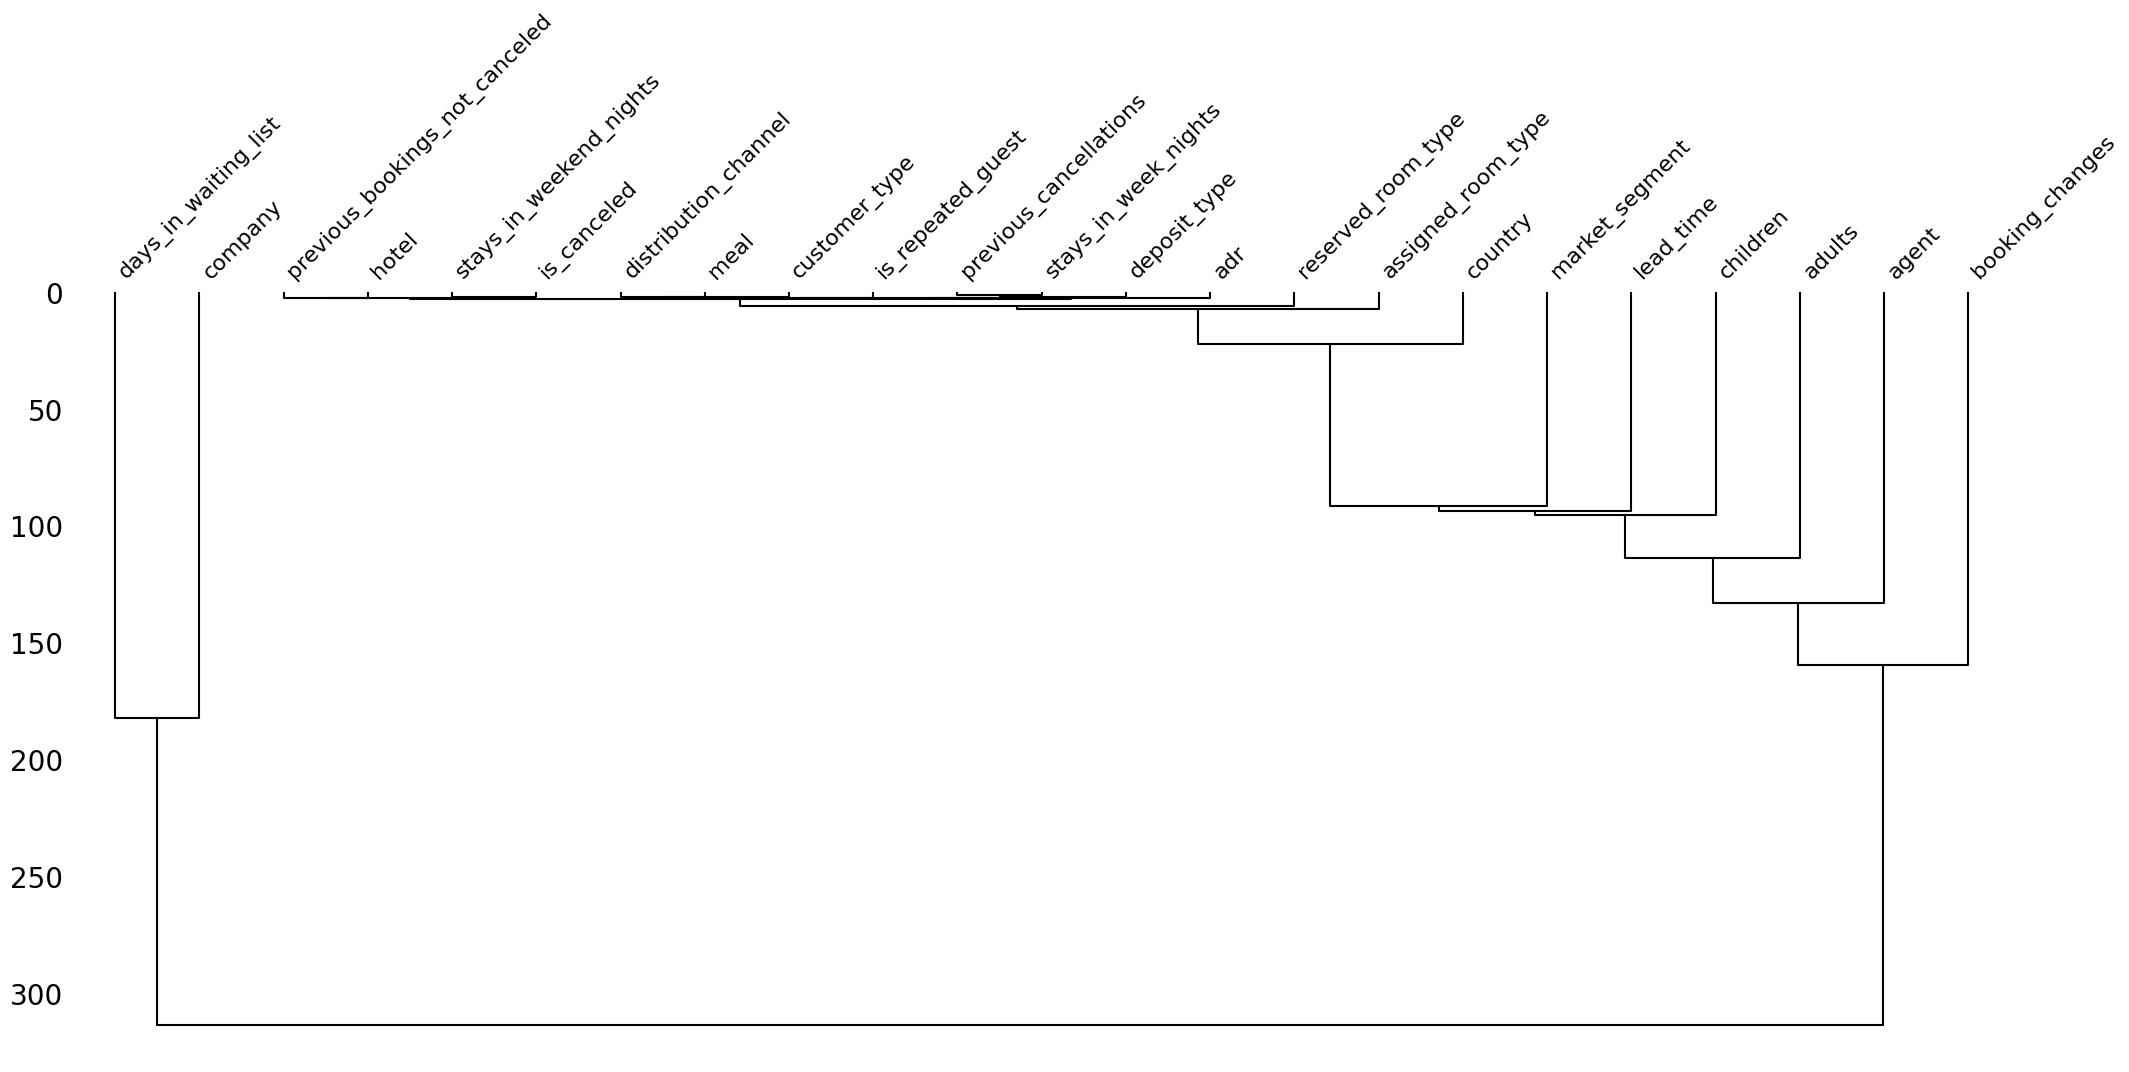

In [27]:
#dendogram will quantify and cluster the missingness
mano.dendrogram(df)

In [28]:
df.isnull().sum()

,0
hotel,10
is_canceled,12
lead_time,8372
stays_in_weekend_nights,13
stays_in_week_nights,15
adults,11953
children,8374
meal,14
country,501
market_segment,8372


# CATEGORICAL (USED MODE)

In [30]:
# Fill missing values in 'hotel' column using mode
df['hotel'].fillna(df['hotel'].mode()[0], inplace=True)

In [31]:
# Fill missing values in 'is_canceled' column using mode
df['is_canceled'].fillna(df['is_canceled'].mode()[0], inplace=True)

<ipython-input-31-5097763dc406>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['is_canceled'].fillna(df['is_canceled'].mode()[0], inplace=True)


In [35]:
# Fill missing values in 'is_repeated_guest' column using mode
df['is_repeated_guest'].fillna(df['is_repeated_guest'].mode()[0], inplace=True)

<ipython-input-35-7559d4441a97>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['is_repeated_guest'].fillna(df['is_repeated_guest'].mode()[0], inplace=True)


In [36]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,8372
stays_in_weekend_nights,13
stays_in_week_nights,15
adults,11953
children,8374
meal,14
country,501
market_segment,8372


# NUMERICAL (MEAN/MEDIAN)

In [37]:
# Create a copy of the DataFrame for mean imputation
df_mean = df.copy()

# Create a copy of the DataFrame for median imputation
df_median = df.copy()

# List of columns with numerical data you want to impute
numerical_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr']


# Iterate through numerical columns and perform mean and median imputation
for col in numerical_cols:
  # Mean imputation
  df_mean[col].fillna(df_mean[col].mean(), inplace=True)

  # Median imputation
  df_median[col].fillna(df_median[col].median(), inplace=True)

# Now you have two separate DataFrames: df_mean and df_median

<ipython-input-37-09291385af86>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean[col].fillna(df_mean[col].mean(), inplace=True)
<ipython-input-37-09291385af86>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

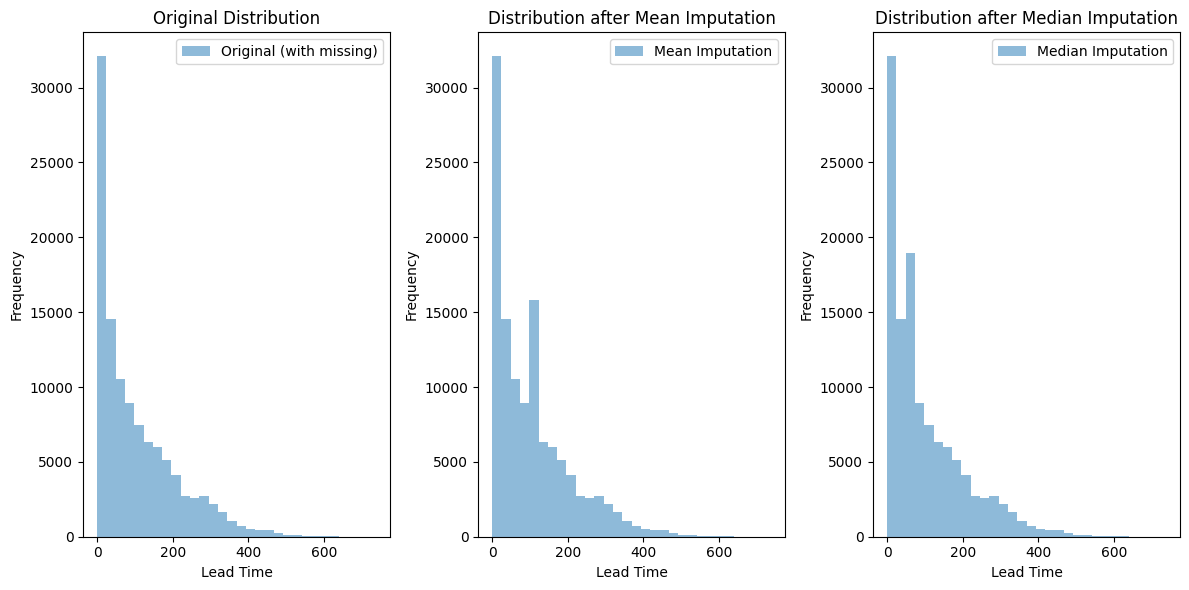

In [38]:
# Assuming you have df_mean and df_median DataFrames after imputation

# Plot distributions for lead time column
plot.figure(figsize=(12, 6))

plot.subplot(1, 3, 1)
plot.hist(df['lead_time'].dropna(), bins=30, alpha=0.5, label='Original (with missing)')
plot.xlabel('Lead Time')
plot.ylabel('Frequency')
plot.title('Original Distribution')
plot.legend()

plot.subplot(1, 3, 2)
plot.hist(df_mean['lead_time'], bins=30, alpha=0.5, label='Mean Imputation')
plot.xlabel('Lead Time')
plot.ylabel('Frequency')
plot.title('Distribution after Mean Imputation')
plot.legend()

plot.subplot(1, 3, 3)
plot.hist(df_median['lead_time'], bins=30, alpha=0.5, label='Median Imputation')
plot.xlabel('Lead Time')
plot.ylabel('Frequency')
plot.title('Distribution after Median Imputation')
plot.legend()

plot.tight_layout()
plot.show()

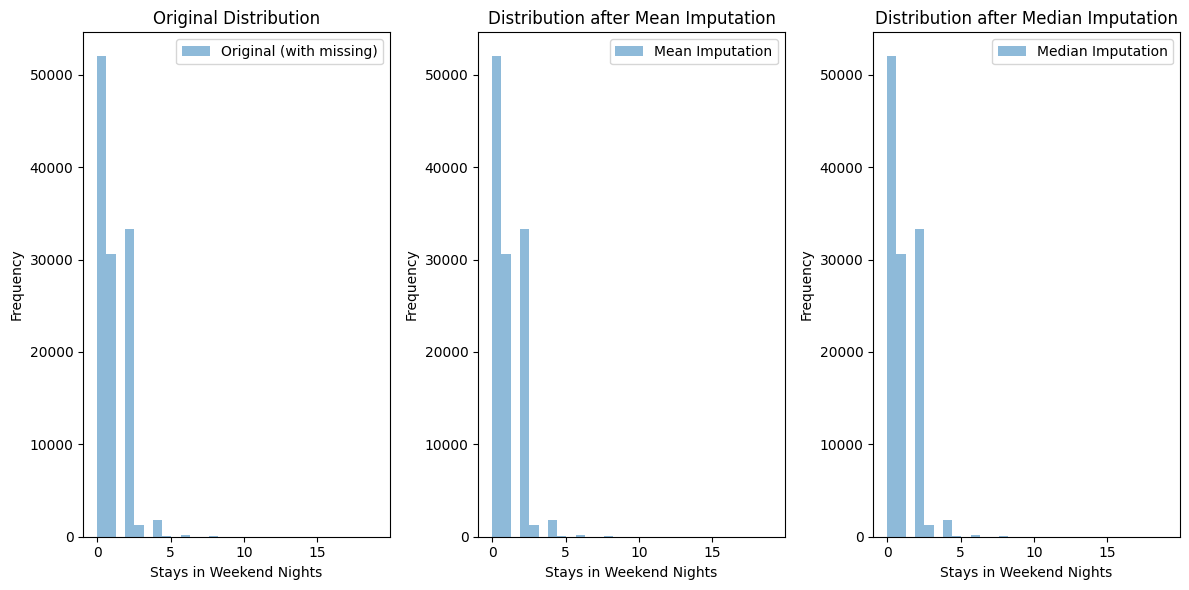

In [39]:
# Plot distributions for stays_in_weekend_nights column
plot.figure(figsize=(12, 6))

plot.subplot(1, 3, 1)
plot.hist(df['stays_in_weekend_nights'].dropna(), bins=30, alpha=0.5, label='Original (with missing)')
plot.xlabel('Stays in Weekend Nights')
plot.ylabel('Frequency')
plot.title('Original Distribution')
plot.legend()

plot.subplot(1, 3, 2)
plot.hist(df_mean['stays_in_weekend_nights'], bins=30, alpha=0.5, label='Mean Imputation')
plot.xlabel('Stays in Weekend Nights')
plot.ylabel('Frequency')
plot.title('Distribution after Mean Imputation')
plot.legend()

plot.subplot(1, 3, 3)
plot.hist(df_median['stays_in_weekend_nights'], bins=30, alpha=0.5, label='Median Imputation')
plot.xlabel('Stays in Weekend Nights')
plot.ylabel('Frequency')
plot.title('Distribution after Median Imputation')
plot.legend()

plot.tight_layout()
plot.show()

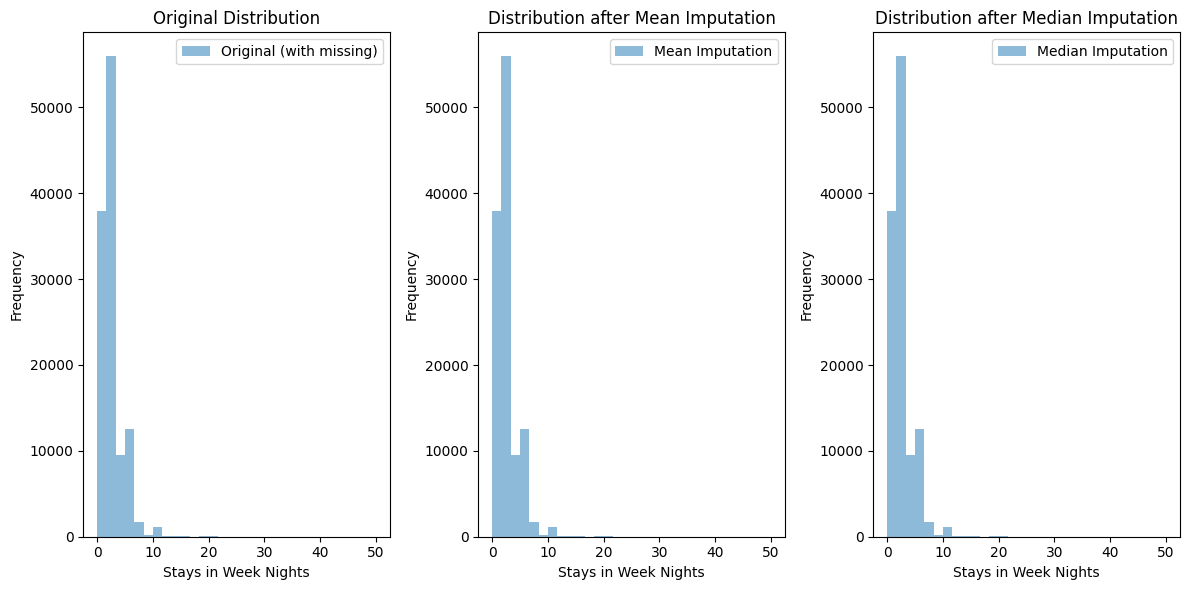

In [40]:
# Plot distributions for stays_in_week_nights column
plot.figure(figsize=(12, 6))

plot.subplot(1, 3, 1)
plot.hist(df['stays_in_week_nights'].dropna(), bins=30, alpha=0.5, label='Original (with missing)')
plot.xlabel('Stays in Week Nights')
plot.ylabel('Frequency')
plot.title('Original Distribution')
plot.legend()

plot.subplot(1, 3, 2)
plot.hist(df_mean['stays_in_week_nights'], bins=30, alpha=0.5, label='Mean Imputation')
plot.xlabel('Stays in Week Nights')
plot.ylabel('Frequency')
plot.title('Distribution after Mean Imputation')
plot.legend()

plot.subplot(1, 3, 3)
plot.hist(df_median['stays_in_week_nights'], bins=30, alpha=0.5, label='Median Imputation')
plot.xlabel('Stays in Week Nights')
plot.ylabel('Frequency')
plot.title('Distribution after Median Imputation')
plot.legend()

plot.tight_layout()
plot.show()

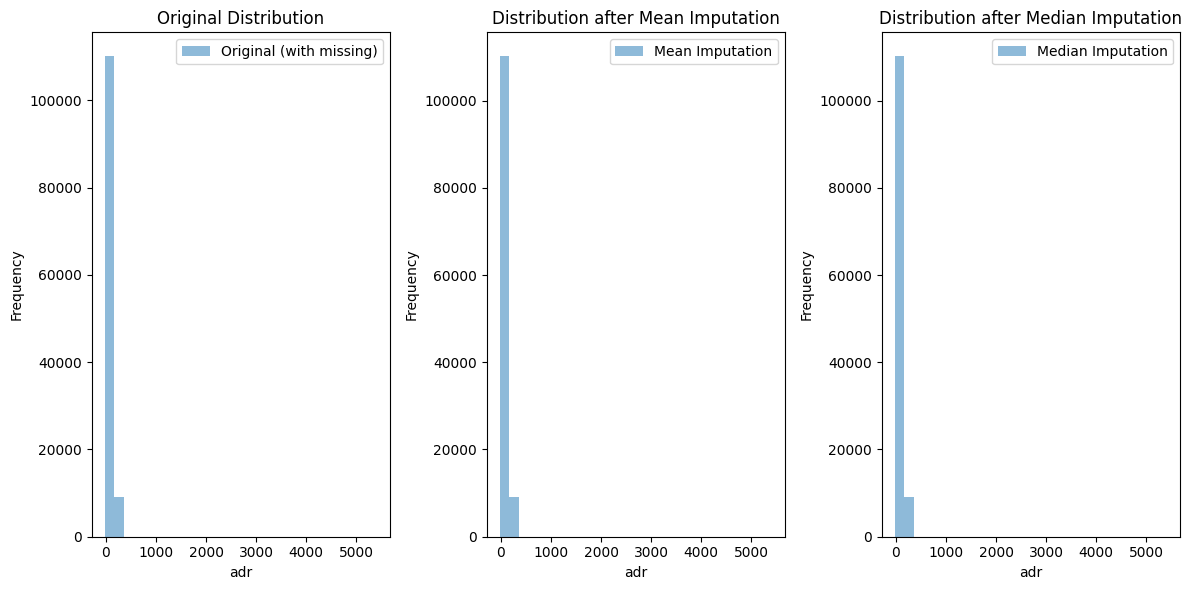

In [41]:
# Plot distributions for adr column
plot.figure(figsize=(12, 6))

plot.subplot(1, 3, 1)
plot.hist(df['adr'].dropna(), bins=30, alpha=0.5, label='Original (with missing)')
plot.xlabel('adr')
plot.ylabel('Frequency')
plot.title('Original Distribution')
plot.legend()

plot.subplot(1, 3, 2)
plot.hist(df_mean['adr'], bins=30, alpha=0.5, label='Mean Imputation')
plot.xlabel('adr')
plot.ylabel('Frequency')
plot.title('Distribution after Mean Imputation')
plot.legend()

plot.subplot(1, 3, 3)
plot.hist(df_median['adr'], bins=30, alpha=0.5, label='Median Imputation')
plot.xlabel('adr')
plot.ylabel('Frequency')
plot.title('Distribution after Median Imputation')
plot.legend()

plot.tight_layout()
plot.show()